# Lab3

Student_id: z5280110
    Name: Xuan Wei

Import the required packages.
Due to the deprecated warning, the warning packet is imported and the warning is ignored,
which does not affect the program result for the time being.
However, it seems that the effect is not good, but these warnings will not affect the operation and results of the code.

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load data set

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
print("Type of x training set:", type(x_train), "Shape of x training set:",x_train.shape)
print("Type of y training set:", type(y_train), "Shape of y training set:",y_train.shape)

Type of x training set: <class 'numpy.ndarray'> Shape of x training set: (60000, 28, 28)
Type of y training set: <class 'numpy.ndarray'> Shape of y training set: (60000,)


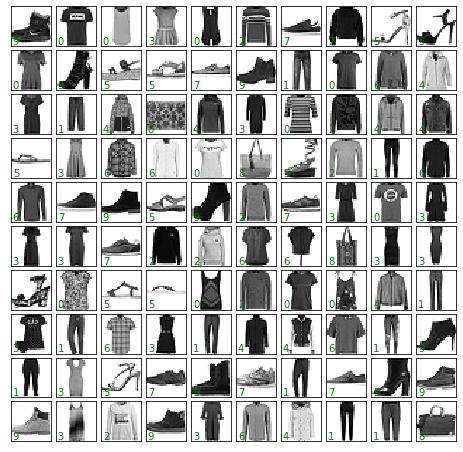

In [5]:
# View the images in the data set
ig, axes = plt.subplots(10,10,figsize=(8,8), subplot_kw={'xticks':[],'yticks':[]},
                      gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='binary', interpolation='nearest')
    ax.text(0.05,0.05,str(y_train[i]), transform=ax.transAxes, color='green')

# Take a subset 2000 before the training set, 500 before the test set

In [6]:
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=0)
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]
print("Type of x training set:", type(x_train), "Shape of x training set:",x_train.shape)
print("Type of y training set:", type(y_train), "Shape of y training set:",y_train.shape)
print("Type of x testing set:", type(x_test), "Shape of x testing set:",x_test.shape)
print("Type of y testing set:", type(y_test), "Shape of y testing set:",y_test.shape)

Type of x training set: <class 'numpy.ndarray'> Shape of x training set: (2000, 28, 28)
Type of y training set: <class 'numpy.ndarray'> Shape of y training set: (2000,)
Type of x testing set: <class 'numpy.ndarray'> Shape of x testing set: (500, 28, 28)
Type of y testing set: <class 'numpy.ndarray'> Shape of y testing set: (500,)


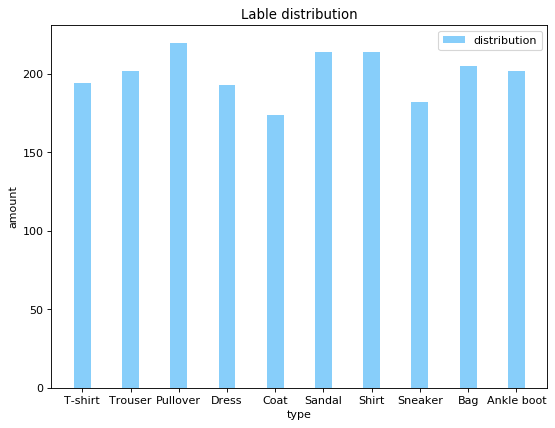

In [7]:
# The categories and tags in the figure below are inquired in the provided link
species=[]
for i in range(10):
    species.append(0)
for i in range(len(y_train)):
    species[y_train[i]]+=1
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
N = 10
index = np.arange(N)
width = 0.35
p2 = plt.bar(index, species,width,label="distribution", color="#87CEFA")
plt.xlabel('type')
plt.ylabel('amount')
plt.title('Lable distribution')
plt.xticks(index,
           ("T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"))
plt.legend(loc="upper right")
plt.show()

# reshape

In [8]:
x_train = x_train.reshape(2000, -1)
x_test = x_test.reshape(500, -1)

In [9]:
print("Type of x training set:", type(x_train), "Shape of x training set:",x_train.shape)
print("Type of y training set:", type(y_train), "Shape of y training set:",y_train.shape)
print("Type of x testing set:", type(x_test), "Shape of x testing set:",x_test.shape)
print("Type of y testing set:", type(y_test), "Shape of y testing set:",y_test.shape)

Type of x training set: <class 'numpy.ndarray'> Shape of x training set: (2000, 784)
Type of y training set: <class 'numpy.ndarray'> Shape of y training set: (2000,)
Type of x testing set: <class 'numpy.ndarray'> Shape of x testing set: (500, 784)
Type of y testing set: <class 'numpy.ndarray'> Shape of y testing set: (500,)


# Classification

# KNN

In [10]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
predict_y_knn = knn_clf.predict(x_test)

In [11]:
print("accuracy:",metrics.accuracy_score(y_test, predict_y_knn))
print("precision:",metrics.precision_score(y_test, predict_y_knn, average="macro"))
print("recall:",metrics.recall_score(y_test, predict_y_knn, average="macro"))
print("F1:",metrics.f1_score(y_test, predict_y_knn, average="macro"))

accuracy: 0.754
precision: 0.772888685552875
recall: 0.7692599156588416
F1: 0.7621095508829365


In [12]:
metrics.confusion_matrix(y_test, predict_y_knn)

array([[44,  0,  0,  2,  0,  0,  3,  0,  0,  0],
       [ 1, 54,  1,  1,  0,  0,  1,  0,  0,  0],
       [ 2,  0, 41,  0,  6,  0,  7,  0,  0,  0],
       [ 5,  1,  1, 37,  0,  0,  1,  0,  1,  0],
       [ 2,  0, 15,  3, 31,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  8,  0, 11],
       [15,  0, 10,  0,  4,  0, 25,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0, 36,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  2,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  3,  0, 41]], dtype=int64)

# DT

In [13]:
dt_clf = DecisionTreeClassifier(random_state = 0)
dt_clf.fit(x_train, y_train)
predict_y_dt = dt_clf.predict(x_test)

In [14]:
print("accuracy:",metrics.accuracy_score(y_test, predict_y_dt))
print("precision:",metrics.precision_score(y_test, predict_y_dt, average="macro"))
print("recall:",metrics.recall_score(y_test, predict_y_dt, average="macro"))
print("F1:",metrics.f1_score(y_test, predict_y_dt, average="macro"))

accuracy: 0.684
precision: 0.6934238798757888
recall: 0.6905655800725813
F1: 0.6894063431306334


In [15]:
metrics.confusion_matrix(y_test, predict_y_dt)

array([[34,  0,  1,  3,  1,  0,  8,  1,  1,  0],
       [ 0, 54,  0,  1,  0,  1,  1,  0,  1,  0],
       [ 2,  2, 31,  1,  6,  0, 13,  0,  1,  0],
       [ 3,  2,  1, 31,  6,  0,  2,  0,  1,  0],
       [ 3,  0, 16,  4, 29,  0,  8,  0,  1,  0],
       [ 1,  0,  0,  0,  0, 46,  0,  3,  1,  2],
       [ 8,  3,  4,  4,  7,  0, 26,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  8,  0, 29,  0,  1],
       [ 0,  1,  0,  2,  2,  2,  2,  0, 29,  0],
       [ 0,  0,  0,  0,  1,  5,  0,  5,  3, 33]], dtype=int64)

# SGD

In [16]:
sgd_clf = SGDClassifier(max_iter = 250)
sgd_clf.fit(x_train, y_train)
predict_y_sgd = sgd_clf.predict(x_test)

In [17]:
print("accuracy:",metrics.accuracy_score(y_test, predict_y_sgd))
print("precision:",metrics.precision_score(y_test, predict_y_sgd, average="macro"))
print("recall:",metrics.recall_score(y_test, predict_y_sgd, average="macro"))
print("F1:",metrics.f1_score(y_test, predict_y_sgd, average="macro"))

accuracy: 0.78
precision: 0.7948886466718924
recall: 0.788723522307025
F1: 0.7884878287728061


In [18]:
metrics.confusion_matrix(y_test, predict_y_sgd)

array([[38,  0,  0,  2,  1,  0,  7,  0,  1,  0],
       [ 0, 55,  1,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 44,  0,  6,  0,  5,  0,  0,  0],
       [ 2,  2,  3, 37,  2,  0,  0,  0,  0,  0],
       [ 0,  0, 18,  3, 35,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  4,  2,  4],
       [ 5,  0,  7,  3,  7,  0, 31,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 34,  0,  2],
       [ 0,  1,  1,  2,  0,  0,  1,  0, 33,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  5,  0, 40]], dtype=int64)

From the above results, DT performed poorly in accuracy, while SGD performed the best. After I checked the data, I found that DT has inconsistent numbers of samples in each category. In the decision tree, the result of information gain is biased for those features that have more numerical values. For KNN, from the label distribution map above, the results caused by uneven sample distribution are not reflected, but its output is not very interpretable. SGD performs best in these three models, although its efficiency is low, but the number of images processed this time is not many, so it is difficult to reflect. These algorithms have their own characteristics, we can choose different algorithms to use according to the situation.